In [37]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [39]:
le = LabelEncoder()
mms = MinMaxScaler()
data['precipitation'] = mms.fit_transform(data[['precipitation']])
data['temp_max'] = mms.fit_transform(data[['temp_max']])
data['temp_min'] = mms.fit_transform(data[['temp_min']])
data['wind'] = mms.fit_transform(data[['wind']])
data['weather'] = le.fit_transform(data['weather'])
data = data.drop(columns=['date'])
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.387097,0.476378,0.472527,0
1,0.194991,0.327957,0.389764,0.450549,2
2,0.014311,0.357527,0.562992,0.208791,2
3,0.363148,0.370968,0.500000,0.472527,2
4,0.023256,0.282258,0.389764,0.626374,2


In [40]:
# Название колонки целевого признака
CELEVOY_PRIZNAK = 'weather'
# Отделили колонку целевого признака (y_train)
X_data, y_data = data.drop(columns=[CELEVOY_PRIZNAK]), data[[CELEVOY_PRIZNAK]]
# Разделили выборку на тренировочную и тестовую
X_test, X_train, y_test, y_train = train_test_split(X_data, y_data)
# Присоединили колонку целевого признака к тренировочной выборке
X_train[CELEVOY_PRIZNAK] = y_train
# Переименовали переменную с тренировочными данными
TRENIROVKA = X_train
# Массив с названиями колонок
ALL_COLUMNS = [col for col in TRENIROVKA]
TRENIROVKA

,precipitation,temp_max,temp_min,wind,weather
195,0.000000,0.715054,0.870079,0.197802,2
1454,0.103757,0.177419,0.366142,0.120879,2
1437,0.967800,0.462366,0.673228,0.637363,2
883,0.000000,0.669355,0.716535,0.219780,4
310,0.005367,0.387097,0.543307,0.340659,2
...,...,...,...,...,...
565,0.000000,0.790323,0.803150,0.164835,4
689,0.000000,0.252688,0.346457,0.428571,4
1065,0.000000,0.161290,0.153543,0.197802,4
193,0.000000,0.731183,0.803150,0.252747,0


In [41]:
# Расстояние между двумя точками
def dist(p: np.ndarray, q: np.ndarray):
    return math.sqrt(sum([(pv - qv) ** 2 for pv, qv in zip(p, q)]))

# Построение графиков с тестовым значением и найденными соседями
def plot_neighbours(X: pd.Series, neighbours: pd.DataFrame):
    X_df = pd.DataFrame(X).T
    X_df[CELEVOY_PRIZNAK] = -1
    axis_couples = []
    for i in range(len(ALL_COLUMNS) - 1):
        for j in range(i + 1, len(ALL_COLUMNS) - 1):
            axis_couples += [(ALL_COLUMNS[i], ALL_COLUMNS[j])]
    for x1, x2 in axis_couples:
        fig, ax = plt.subplots()
        sns.scatterplot(ax=ax, x=x1, y=x2, data=neighbours, hue=CELEVOY_PRIZNAK, palette=['#0000ff', '#ff0000', '#00ff00', '#00ffff', '#ff00ff', '#ffff00'])
        sns.scatterplot(ax=ax, x=x1, y=x2, data=X_df, hue=CELEVOY_PRIZNAK, palette=['#000000'], marker='X', s=200)

# Поиск соседей в тренировочных данных
def get_neighbors(K: int, X: pd.Series):
    X_array = X.to_numpy()        
    return pd.DataFrame.from_records(sorted(TRENIROVKA.to_numpy(), key=lambda x: dist(x[:-1], X_array))[0:K], columns=ALL_COLUMNS)

# Прелсказание категориального целевого признака по соседям
def predict_one(X: pd.Series, neighbours: pd.DataFrame):
    neighbours = [(dist(val[:-1], X.to_numpy()), val[-1]) for val in neighbours.to_numpy()]
    unique, counts = np.unique([val[1] for val in neighbours], return_counts=True)
    return sorted(np.c_[unique, counts], key=lambda x: x[1])[-1][0]


C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\2386847618.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(ax=ax, x=x1, y=x2, data=neighbours, hue=CELEVOY_PRIZNAK, palette=['#0000ff', '#ff0000', '#00ff00', '#00ffff', '#ff00ff', '#ffff00'])
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\2386847618.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(ax=ax, x=x1, y=x2, data=neighbours, hue=CELEVOY_PRIZNAK, palette=['#0000ff', '#ff0000', '#00ff00', '#00ffff', '#ff00ff', '#ffff00'])
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\2386847618.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(ax=ax, x=x1, y=x2, data=neighbours, hue=CELEVOY_PRIZNAK, palette=['#0000ff', '#ff0000', '#00ff00', '#00ffff', '#ff00ff', '#ffff00'])
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\2386847618.

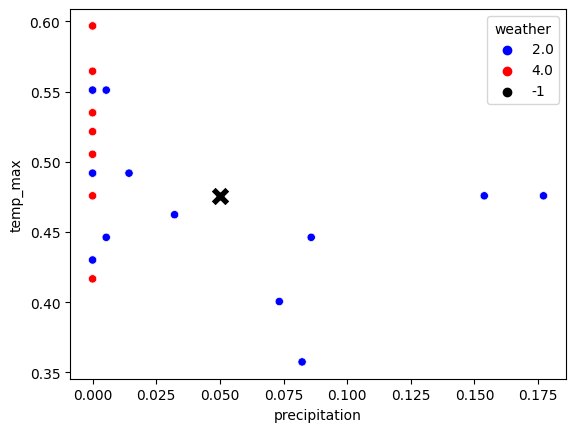

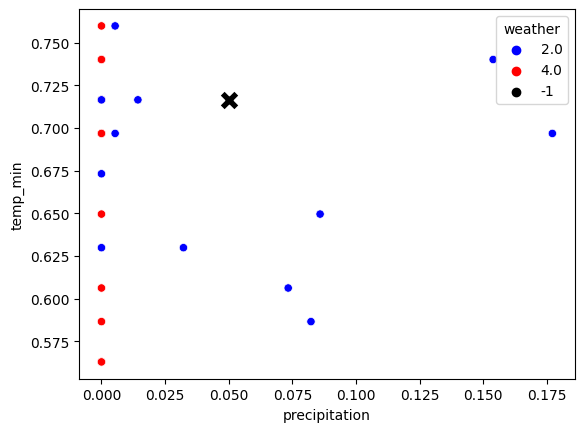

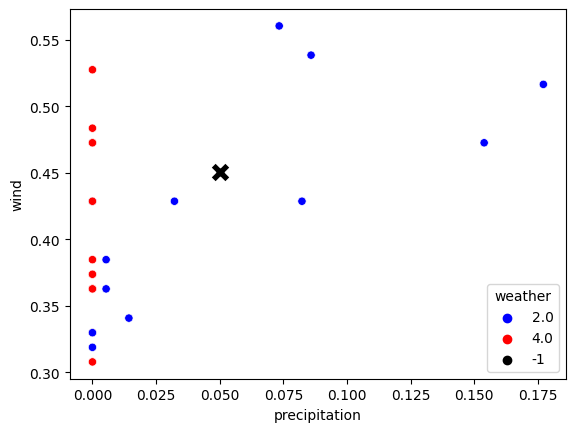

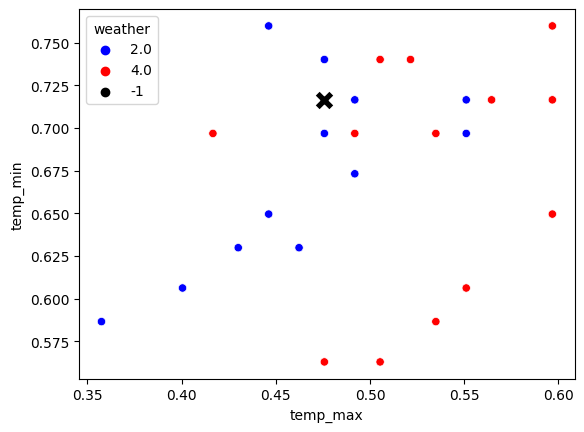

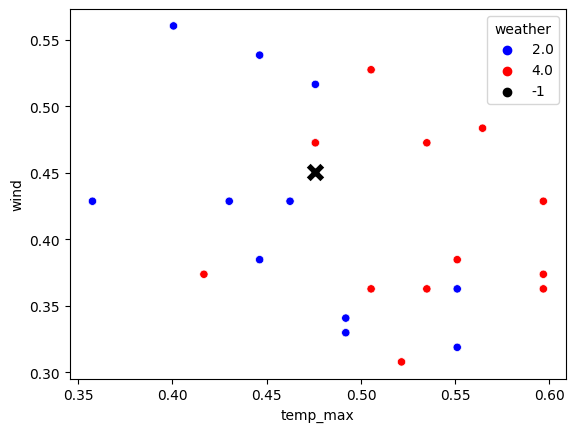

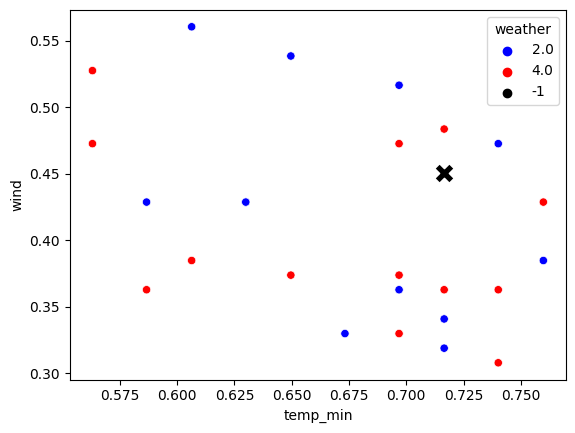

In [42]:
X_cocedi = []

# Для каждой строки в тестовой выборке находим 25 соседей 
for index, X in X_test.iterrows():
    cocedi = get_neighbors(25, X)
    X_cocedi += [(X, cocedi)]

# Выбираем первое значение тестовой выборки и его значение, затем рисуем графики с ними
plot_neighbours(X_cocedi[0][0], X_cocedi[0][1])

In [43]:
# Предсказание для первого значения тестовой выборки
pred = predict_one(X_cocedi[0][0], X_cocedi[0][1])
pred

4.0

In [44]:
# Добавляем в тестовую выборку столбец с предсказанными значениями
pred = pd.DataFrame(columns=ALL_COLUMNS)
for X, neighbours in X_cocedi:
    X[f'{CELEVOY_PRIZNAK}_pred'] = predict_one(X, neighbours)
    pred = pred.append(X)
pred[CELEVOY_PRIZNAK] = y_test

C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\437189567.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\437189567.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\437189567.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\437189567.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\437189567.py:5: FutureWarning: The frame.append method is 

In [45]:
pred.head()

,precipitation,temp_max,temp_min,wind,weather,weather_pred
631,0.050089,0.475806,0.716535,0.450549,2,4.0
128,0.000000,0.534946,0.649606,0.285714,4,4.0
860,0.008945,0.462366,0.562992,0.186813,2,4.0
1402,0.014311,0.327957,0.476378,0.109890,2,2.0
320,0.100179,0.295699,0.366142,0.131868,2,2.0


In [46]:
# Вычисляем точность предсказаний
count = len(pred)
count_true = 0
index = 0
for index, X in pred.iterrows():
    if X[CELEVOY_PRIZNAK] == X[f'{CELEVOY_PRIZNAK}_pred']:
        count_true += 1
accuracy_manual = count_true / count
accuracy_manual

0.6821917808219178

In [47]:
# Находим оптимальное значение k с помощью RandomizedSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)

rnd = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

random_search=rnd.fit(X_train.to_numpy(), y_train.to_numpy().flatten())
best_K = random_search.best_params_['n_neighbors']
best_K

c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


6

In [48]:
# Находим соседей, проводим предсказания и вычисляем точность предсказаний для значения k, полученного с помощью RandomizedSearchCV
X_neighbours = []

for index, X in X_test.iterrows():
    neighbours = get_neighbors(best_K, X)
    X_neighbours += [(X, neighbours)]

pred = pd.DataFrame(columns=ALL_COLUMNS)
for X, neighbours in X_neighbours:
    X[f'{CELEVOY_PRIZNAK}_pred'] = predict_one(X, neighbours)
    pred = pred.append(X)
pred[CELEVOY_PRIZNAK] = y_test

count = len(pred)
count_true = 0
index = 0
for index, X in pred.iterrows():
    if X[CELEVOY_PRIZNAK] == X[f'{CELEVOY_PRIZNAK}_pred']:
        count_true += 1
accuracy_rs = count_true / count
accuracy_rs

C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\1867207189.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\1867207189.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\1867207189.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\1867207189.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(X)
C:\Users\miss-\AppData\Local\Temp\ipykernel_17368\1867207189.py:11: FutureWarning: The frame.append 

0.7041095890410959